In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

In [ ]:
df.head()

In [8]:
sample_rate = '1W'
def resample_df(df,sample_rate):
    
    input_df = df
    to_last = ['gasMeter','eMeter']
    input_df[to_last] = input_df[to_last].resample(sample_rate).last()
    input_df = input_df.resample(sample_rate).mean()
    
    return(input_df)

rdf=resample_df(df,sample_rate)

rdftrain = rdf[:]
rdfval = rdf[:]

#trdf = rdf[rdf['T'] < 16]
#trdftrain = trdf[:6]
#trdfval = trdf[6:]


In [ ]:
print(rdf)

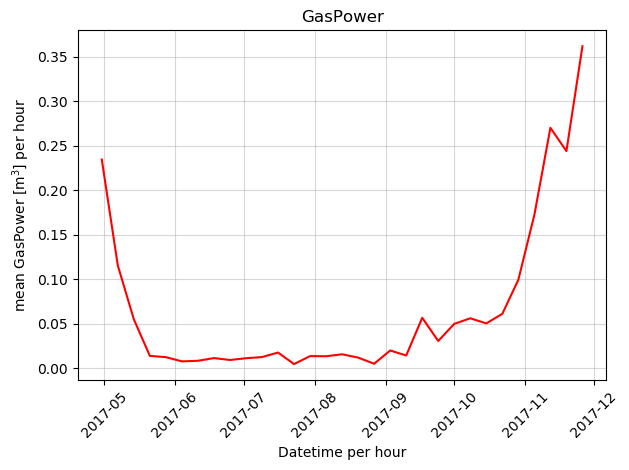

In [9]:
plt.title('GasPower')

plt.plot(rdftrain.index[:],rdftrain['gasPower'][:], '-', color='r', ms=10)
plt.ylabel('mean GasPower [m$^3$] per hour')
plt.xlabel('Datetime per hour')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

#plt.savefig('humanpatterns.png', dpi=700)

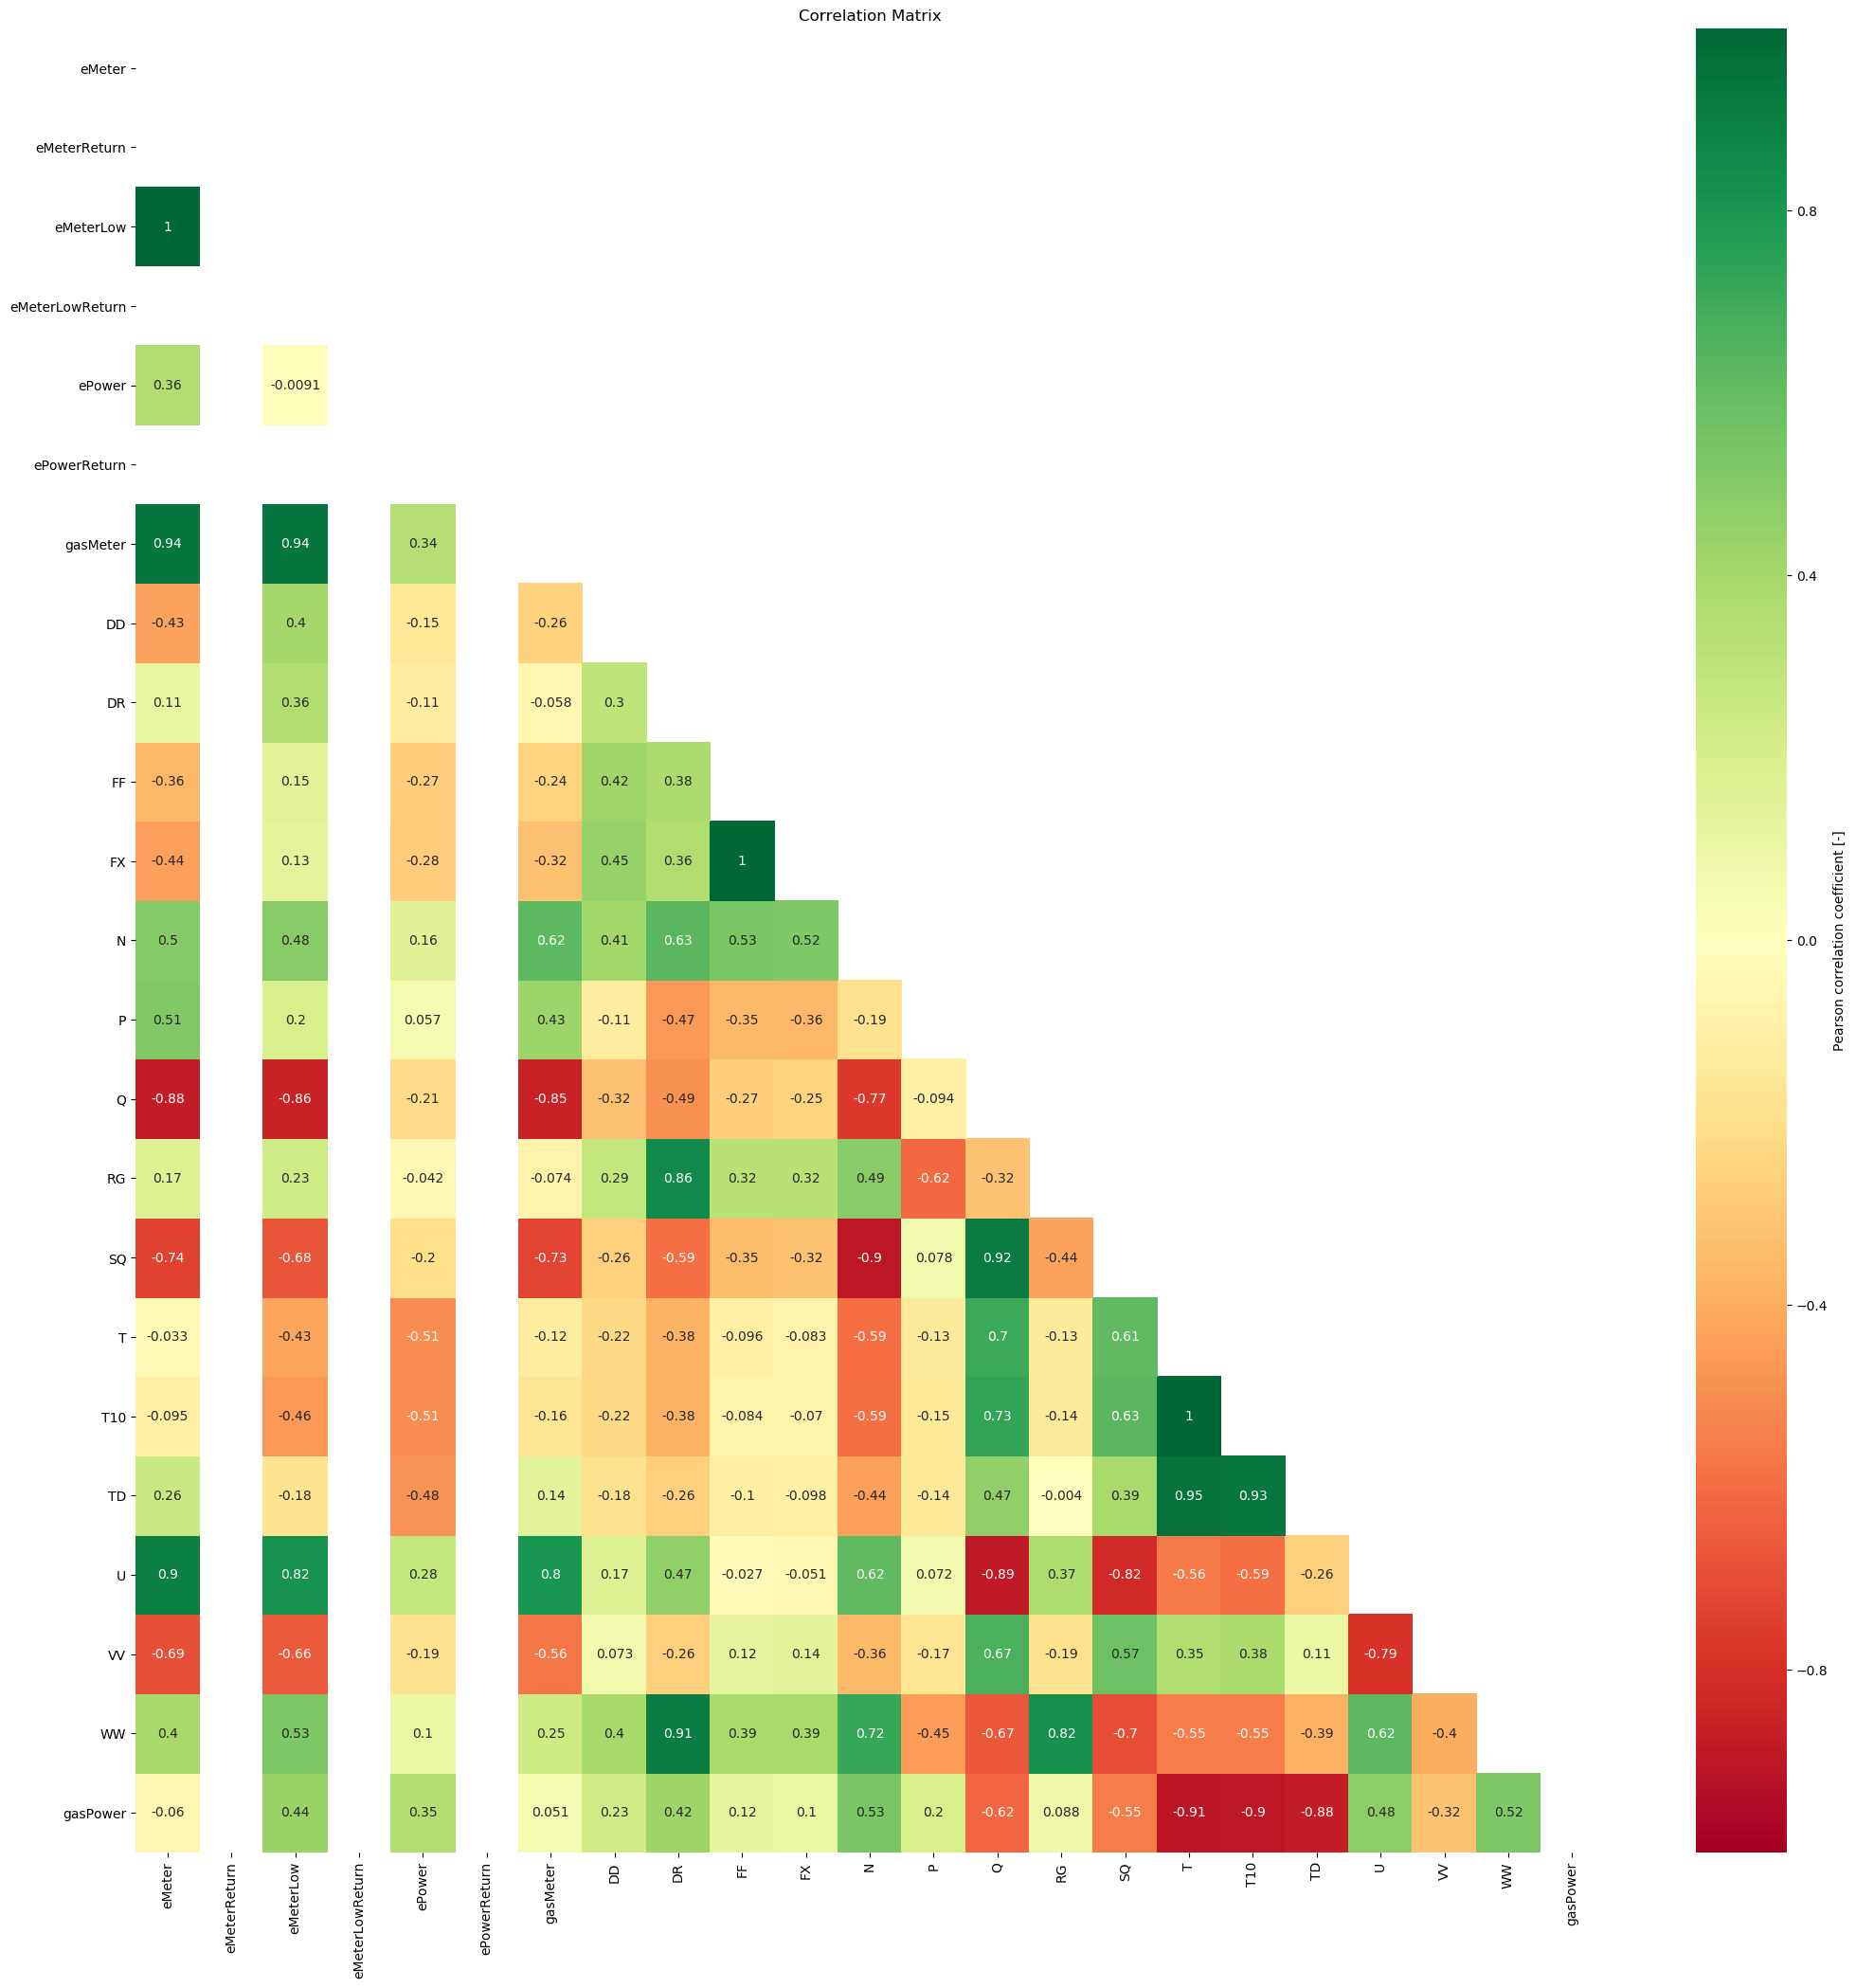

In [10]:
corr = rdftrain.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax,
            cbar_kws={'label':'Pearson correlation coefficient [-]'})

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#plt.savefig('sample.png', dpi=500)
plt.show()


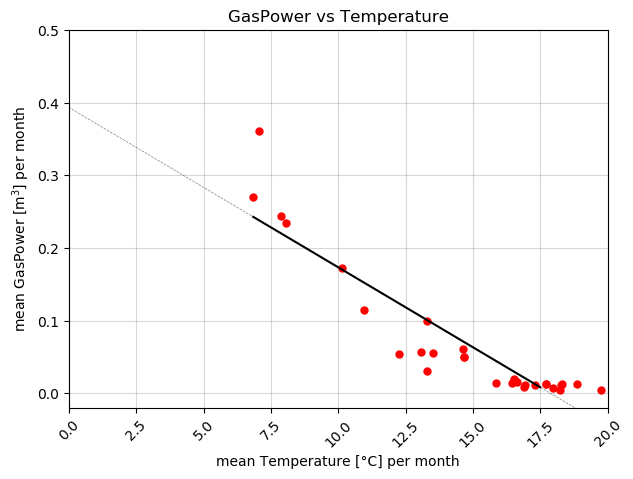

In [11]:
plt.title('GasPower vs Temperature')

plt.plot(rdftrain['T'][:],rdftrain['gasPower'][:], '.', color='r', ms=10)
plt.ylabel('mean GasPower [m$^3$] per month')
plt.xlabel('mean Temperature [°C] per month')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

# linear regressions
params = np.polyfit(rdftrain['T'],rdftrain['gasPower'], 1)
def model(x, a, b):
    return a * x + b

# Extrapolations
x = np.array([0,30])
plt.plot(x, model(x, *params), 'k--', alpha=0.5, linewidth=0.5)

#Fit
x = np.array([min(rdftrain['T']), 17.5])
plt.plot(x, model(x, *params), 'k-')

plt.xlim(0,20)
plt.ylim(-0.02, 0.5)

#plt.savefig('gasvstemp1d.png', dpi=700)
plt.show()

[ 8.04500003 17.5       ]
